<a href="https://colab.research.google.com/github/Jahnavi-Sri-Kavya/Cloud-Computing-Project/blob/main/CC_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


# New Section

In [3]:
from google.colab import auth
auth.authenticate_user()


In [4]:
!gsutil cp gs://diabetic-dataset-bucket/diabetes.csv /content/

Copying gs://diabetic-dataset-bucket/diabetes.csv...
/ [1 files][  3.6 MiB/  3.6 MiB]                                                
Operation completed over 1 objects/3.6 MiB.                                      


In [5]:
file_path = '/content/diabetes.csv'
df = pd.read_csv(file_path)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


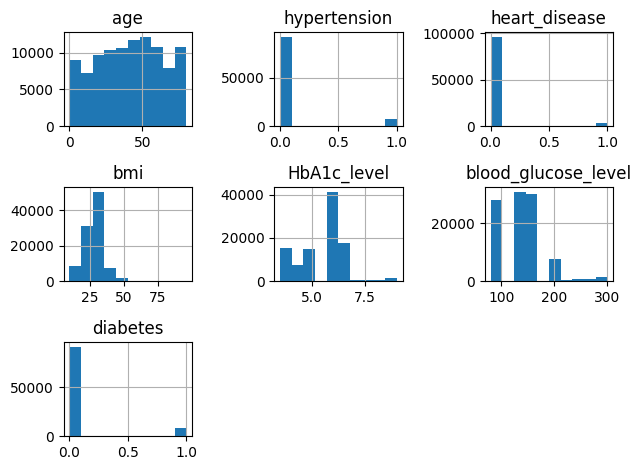

In [7]:
# show histogram
df.hist()
plt.tight_layout()
plt.show()

In [8]:
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5

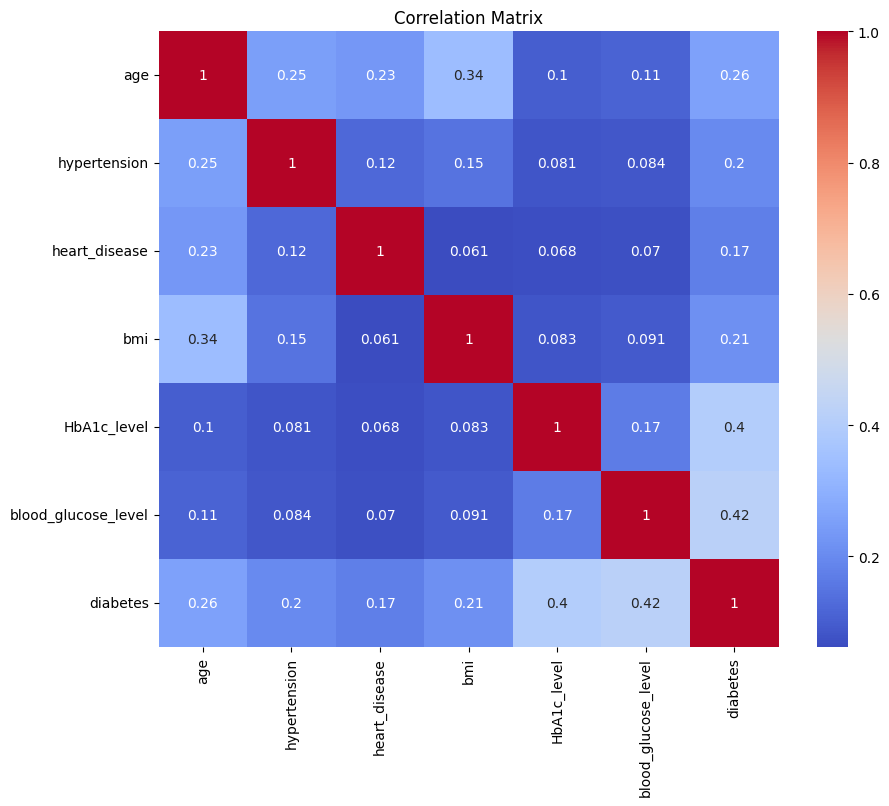

In [9]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Identify categorical columns
categorical_columns = ['gender', 'smoking_history']

# Convert categorical columns to the 'category' data type
df[categorical_columns] = df[categorical_columns].astype('category')

# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


In [11]:
X = df.drop(columns=['diabetes'])
y = df['diabetes']

In [12]:
scaler = StandardScaler()
X[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = scaler.fit_transform(X[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1750/1750 [==============================] - 8s 4ms/step - loss: 0.1282 - accuracy: 0.9576 - val_loss: 0.1026 - val_accuracy: 0.9651
Epoch 2/10
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0947 - accuracy: 0.9671 - val_loss: 0.0919 - val_accuracy: 0.9686
Epoch 3/10
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0877 - accuracy: 0.9698 - val_loss: 0.0898 - val_accuracy: 0.9692
Epoch 4/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.0851 - accuracy: 0.9709 - val_loss: 0.0897 - val_accuracy: 0.9694
Epoch 5/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0835 - accuracy: 0.9712 - val_loss: 0.0857 - val_accuracy: 0.9712
Epoch 6/10
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0825 - accuracy: 0.9718 - val_loss: 0.0869 - val_accuracy: 0.9706
Epoch 7/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0819 - accuracy: 0.9721 - val_loss: 0.0849 - val_accuracy:

In [16]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Training Loss: {train_loss}")
print(f"Training Accuracy: {train_accuracy}")

2188/2188 [==============================] - 9s 4ms/step - loss: 0.0814 - accuracy: 0.9723
Training Loss: 0.08141043782234192
Training Accuracy: 0.9722714424133301


In [17]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

938/938 [==============================] - 5s 6ms/step - loss: 0.0828 - accuracy: 0.9712
Test Loss: 0.08284401148557663
Test Accuracy: 0.9711999893188477


In [18]:
# Save the TensorFlow model
model.save('my_model')

In [19]:
!gsutil -m cp -r my_model gs://diabetic-dataset-bucket/models/


Copying file://my_model/fingerprint.pb [Content-Type=application/octet-stream]...
Copying file://my_model/saved_model.pb [Content-Type=application/octet-stream]...
Copying file://my_model/variables/variables.index [Content-Type=application/octet-stream]...
Copying file://my_model/keras_metadata.pb [Content-Type=application/octet-stream]...
Copying file://my_model/variables/variables.data-00000-of-00001 [Content-Type=application/octet-stream]...
\ [5/5 files][150.0 KiB/150.0 KiB] 100% Done                                    
Operation completed over 5 objects/150.0 KiB.                                    
